# İmport Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Read Dataset

In [2]:
df = pd.read_csv("ds_salaries.csv")
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


* work_year             The year the salary was paid.
    
* experience_level:      The experience level in the job during the year with the following possible values: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director
  
* employment_type:       The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance

* job_title:             The role worked in during the year.

* salary:                The total gross salary amount paid.
    
* salary_currency:       The currency of the salary paid as an ISO 4217 currency code.
            
* salary_in_usd:         The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).
       
* employee_residence:    Employee's primary country of residence in during the work year as an ISO 3166 country code.
        
* remote_ratio:          The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%)
          
* company_location:      The country of the employer's main office or contracting branch as an ISO 3166 country code.
        
* company_size:          The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large)


# EDA

In [3]:
df.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [4]:
df.drop(["Unnamed: 0"],axis = 1,inplace = True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [6]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


In [7]:
model_target = "salary_in_usd"
model_features = df.columns.drop("salary_in_usd")

print(f"Model Target {model_target}")
print(f"Model Features {model_features}")

Model Target salary_in_usd
Model Features Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size'],
      dtype='object')


In [8]:
numerical_features = df[model_features].select_dtypes(include=np.number).columns
print('Numerical columns:',numerical_features)

print('')

categorical_features = df[model_features].select_dtypes(include='object').columns
print('Categorical columns:',categorical_features)

Numerical columns: Index(['work_year', 'salary', 'remote_ratio'], dtype='object')

Categorical columns: Index(['experience_level', 'employment_type', 'job_title', 'salary_currency',
       'employee_residence', 'company_location', 'company_size'],
      dtype='object')


In [9]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

# Basic Plots

<AxesSubplot:ylabel='Frequency'>

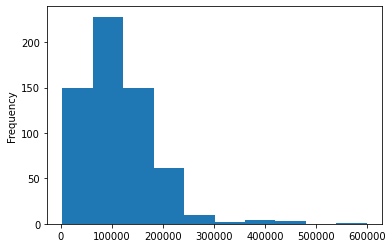

In [10]:
df["salary_in_usd"].plot.hist()

## Categorical Features

In [11]:
for c in categorical_features:
    print(df[c].value_counts())

SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64
FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64
Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer             

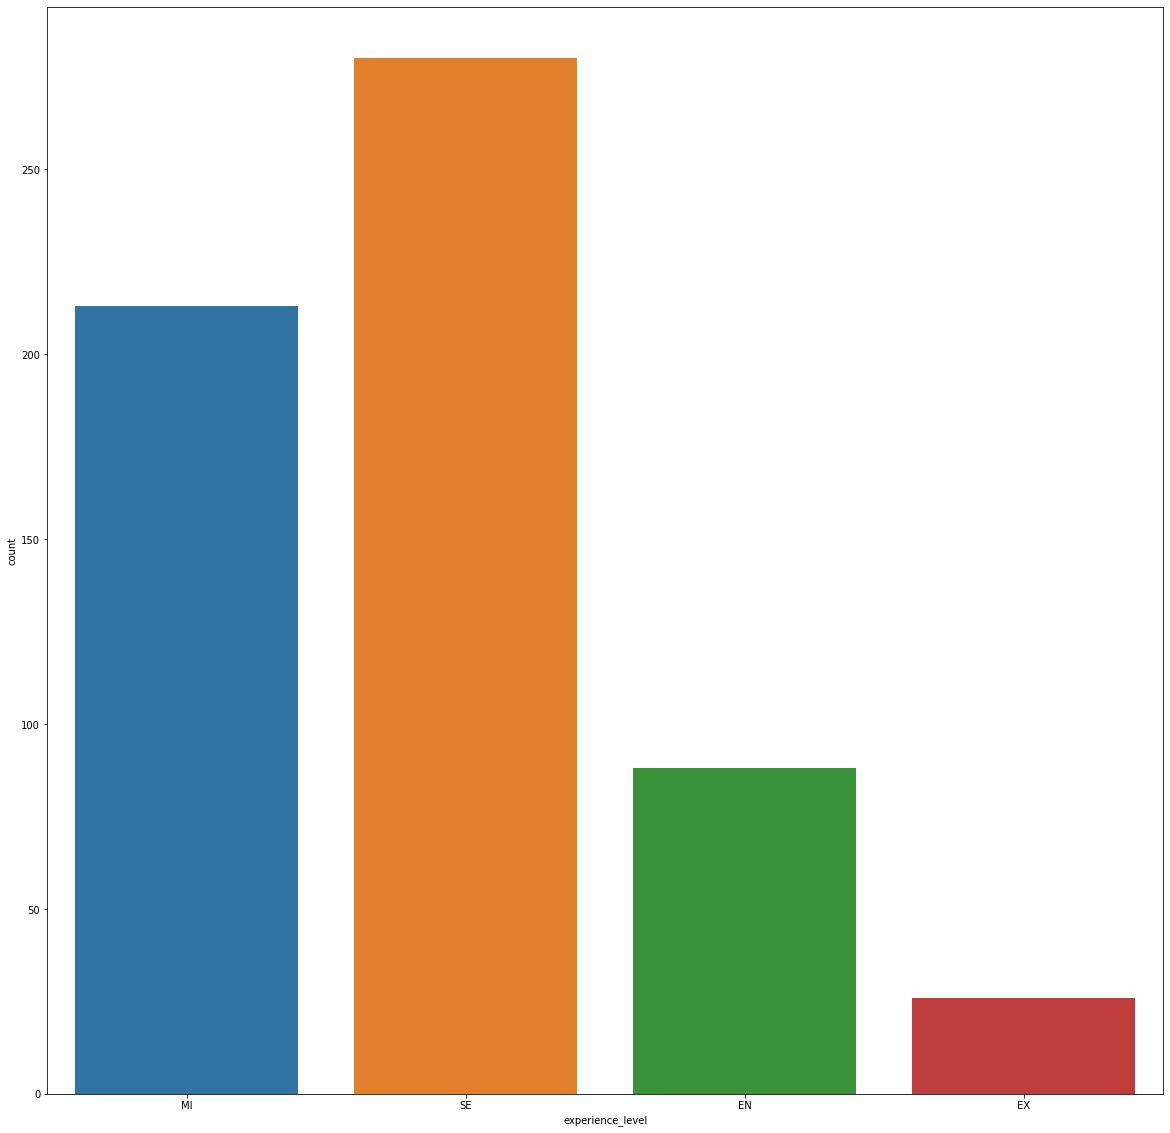

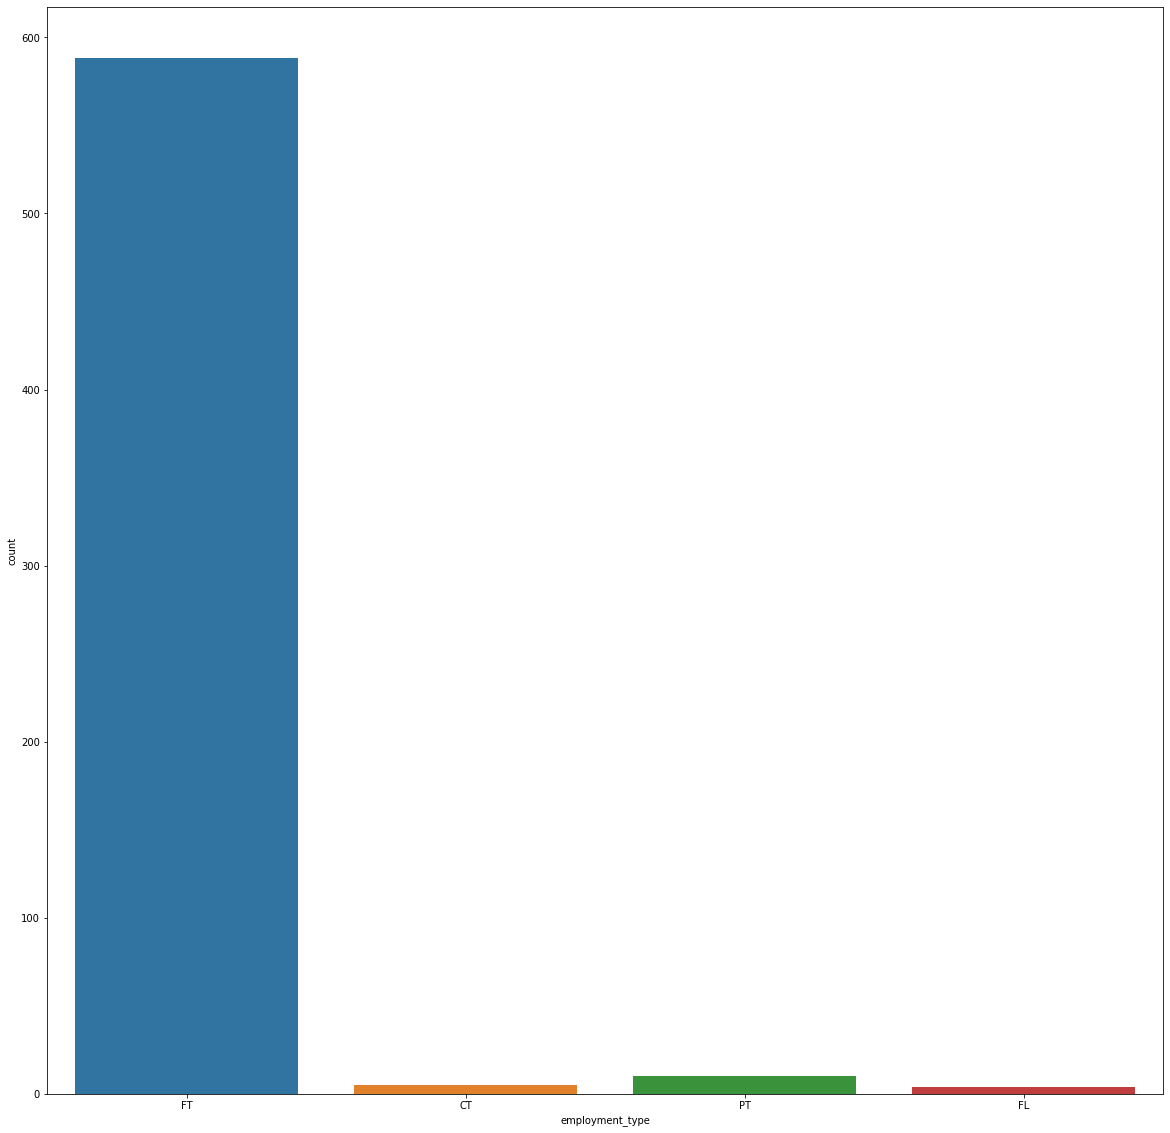

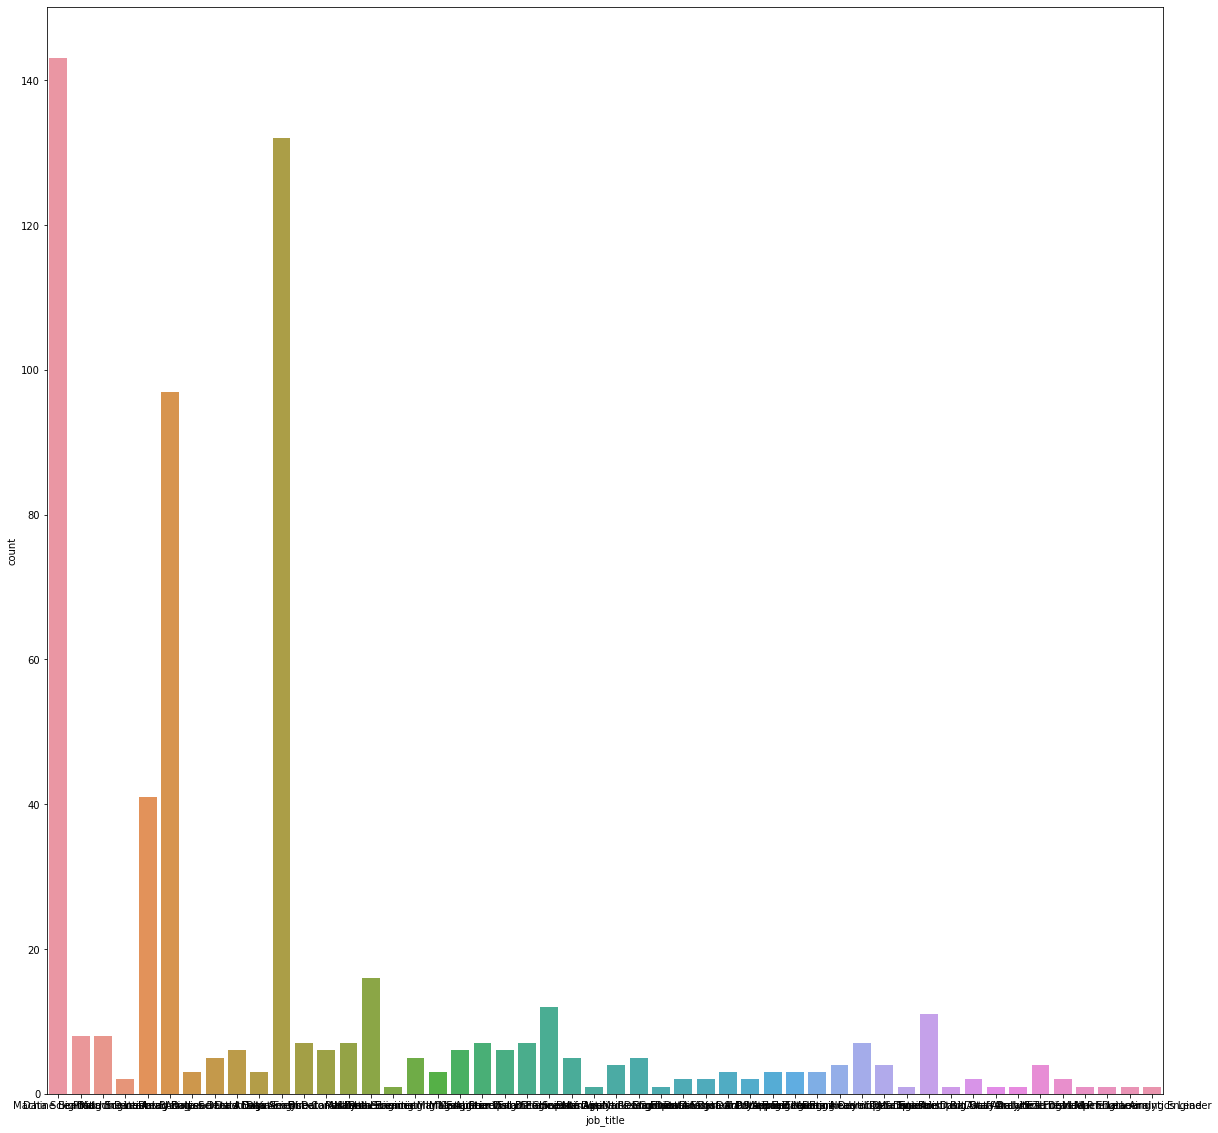

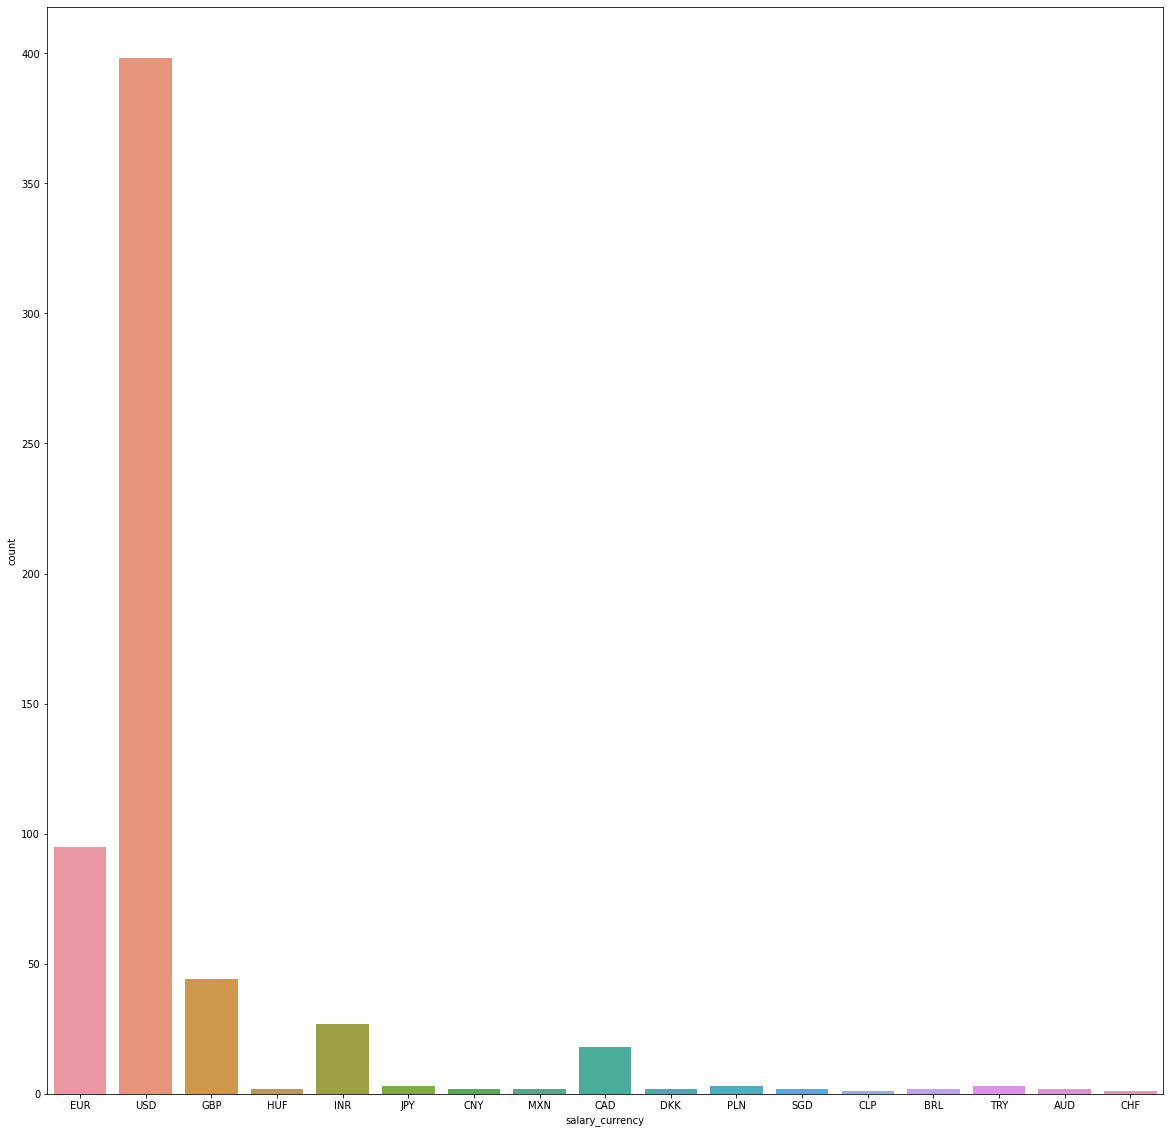

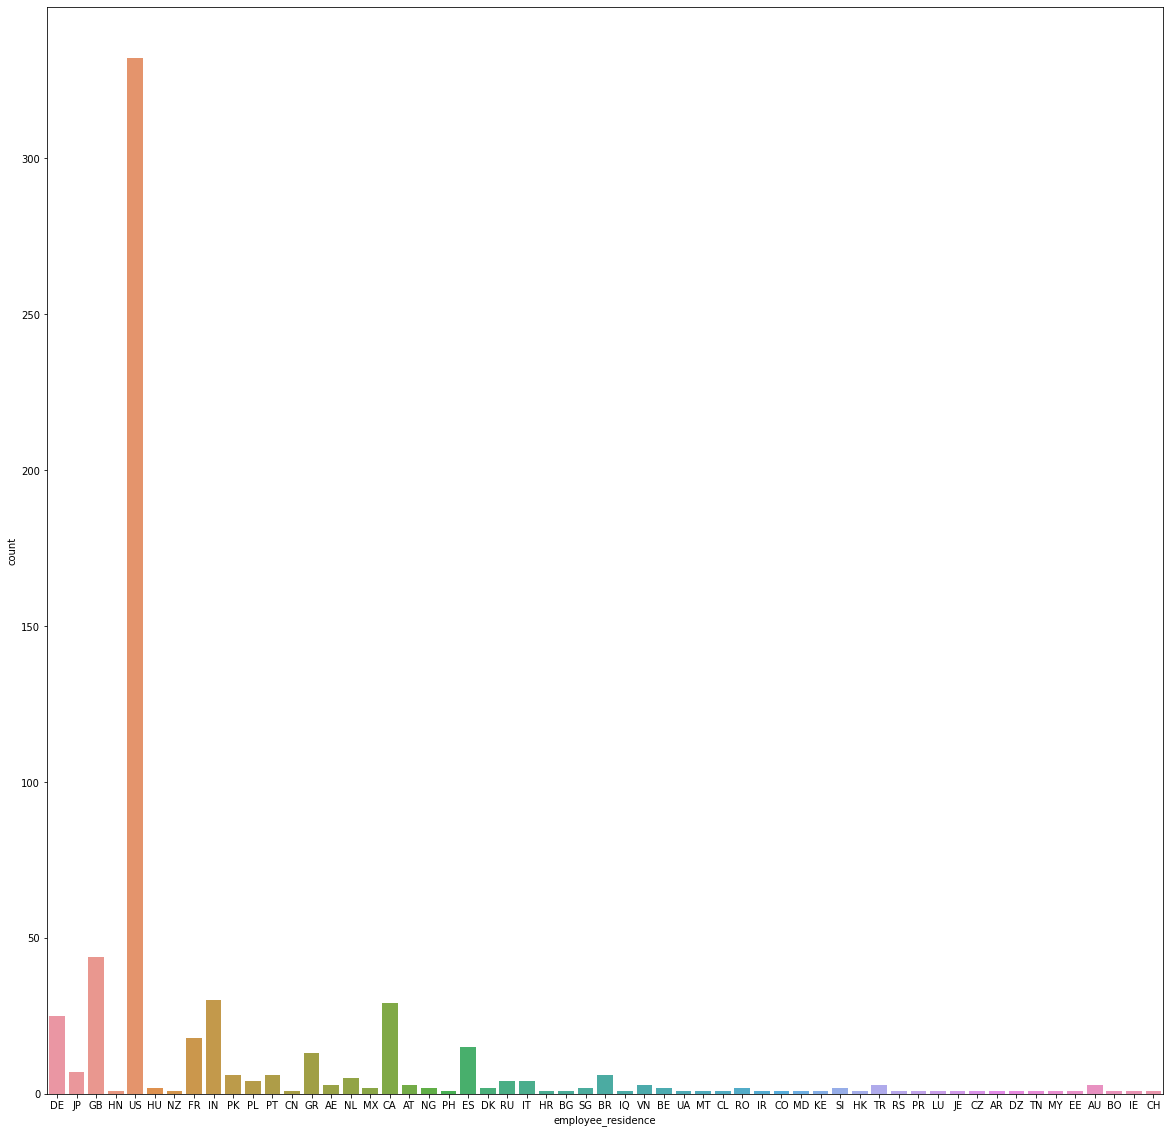

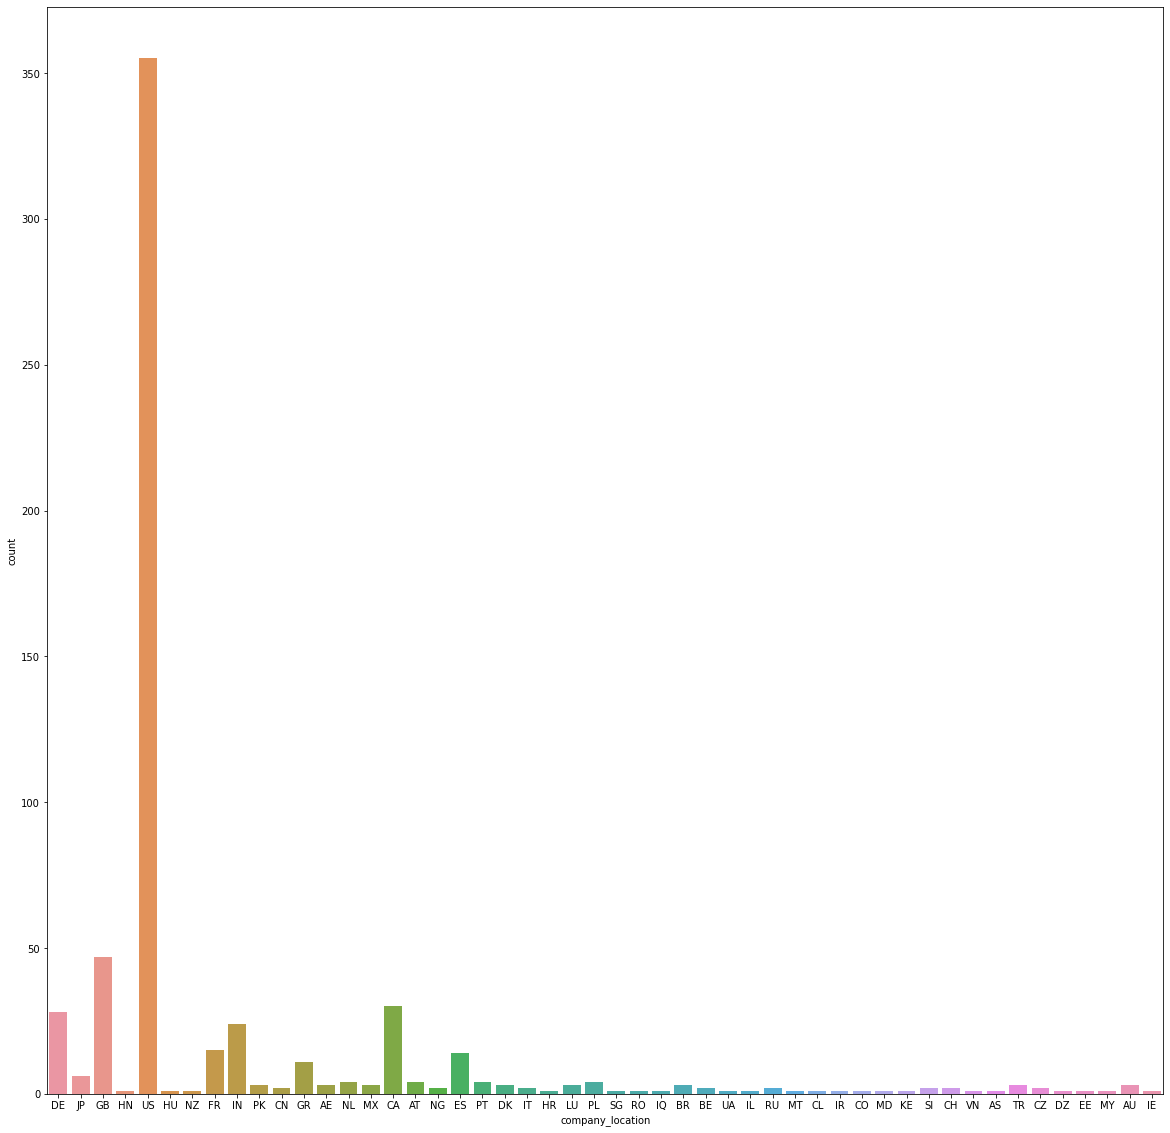

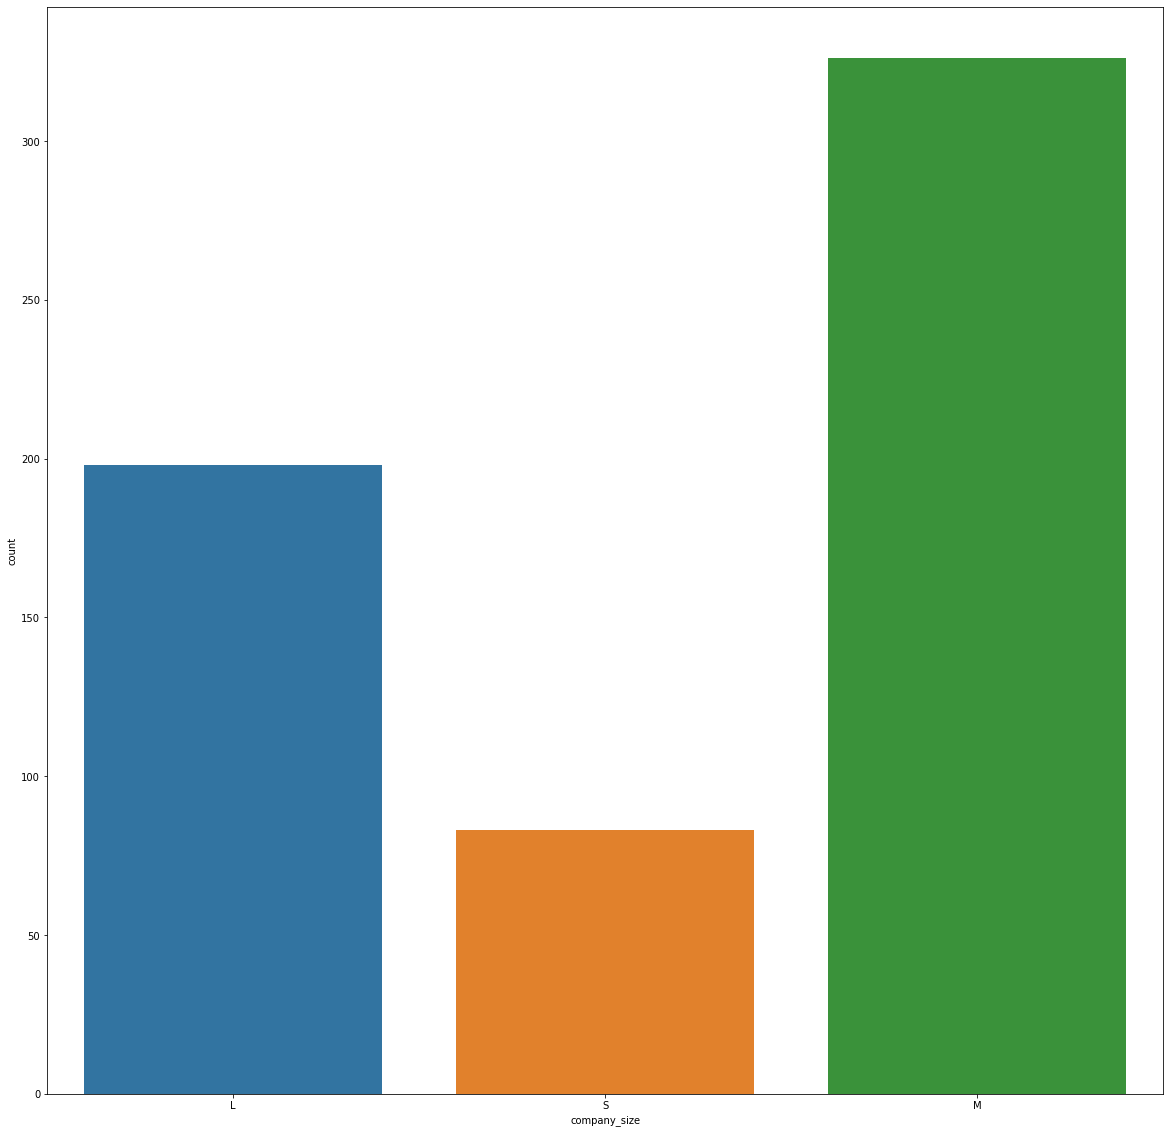

In [12]:
for c in categorical_features:
    plt.figure(figsize = (20,20))
    sns.countplot(data = df, x = c)
    plt.show()

## Numerical Features

In [13]:
for c in numerical_features:
    print(df[c].value_counts(bins = 10))

(2021.8, 2022.0]      318
(2020.8, 2021.0]      217
(2019.997, 2020.2]     72
(2020.2, 2020.4]        0
(2020.4, 2020.6]        0
(2020.6, 2020.8]        0
(2021.0, 2021.2]        0
(2021.2, 2021.4]        0
(2021.4, 2021.6]        0
(2021.6, 2021.8]        0
Name: work_year, dtype: int64
(-26396.001, 3043600.0]     597
(3043600.0, 6083200.0]        4
(6083200.0, 9122800.0]        3
(9122800.0, 12162400.0]       2
(27360400.0, 30400000.0]      1
(12162400.0, 15202000.0]      0
(15202000.0, 18241600.0]      0
(18241600.0, 21281200.0]      0
(21281200.0, 24320800.0]      0
(24320800.0, 27360400.0]      0
Name: salary, dtype: int64
(90.0, 100.0]     381
(-0.101, 10.0]    127
(40.0, 50.0]       99
(10.0, 20.0]        0
(20.0, 30.0]        0
(30.0, 40.0]        0
(50.0, 60.0]        0
(60.0, 70.0]        0
(70.0, 80.0]        0
(80.0, 90.0]        0
Name: remote_ratio, dtype: int64


work_year


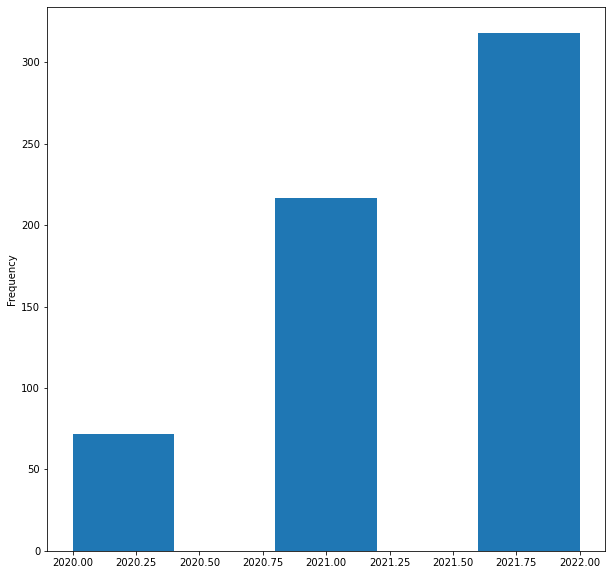

salary


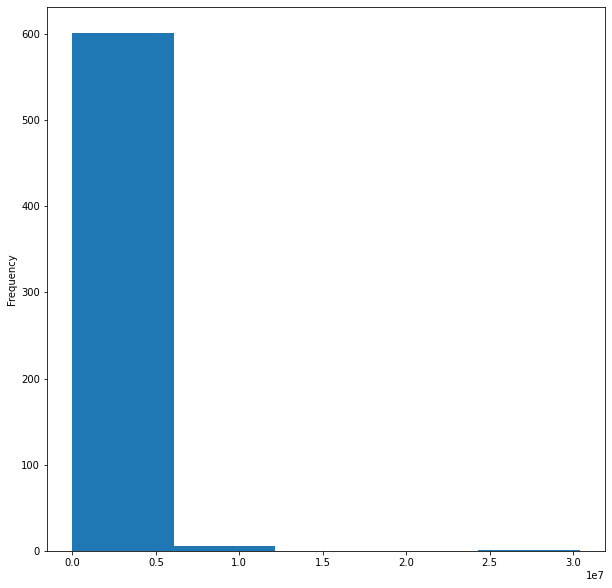

remote_ratio


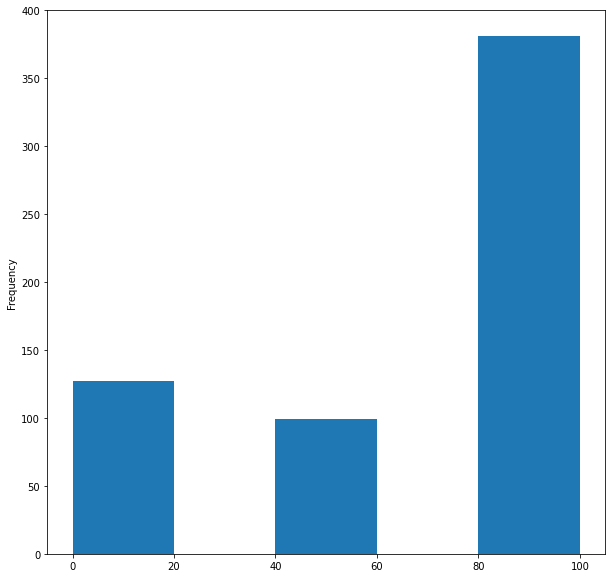

In [14]:
for c in numerical_features:
    plt.figure(figsize = (10,10))
    print(c)
    df[c].plot.hist(bins = 5)
    plt.show()

# Feature Engineering

## year

In [15]:
df["current_year"] = 2022
df["year"] = df["current_year"]- df["work_year"]

df.drop(["current_year"],axis = 1,inplace = True)
df.drop(["work_year"],axis = 1,inplace = True)

In [16]:
df.head()

,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,year
0,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,2
1,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,2
2,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,2
3,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,2
4,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,2


## currency, salary

In [17]:
df.drop(["salary","salary_currency"],axis = 1, inplace= True)

In [18]:
df.head()

,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,year
0,MI,FT,Data Scientist,79833,DE,0,DE,L,2
1,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S,2
2,SE,FT,Big Data Engineer,109024,GB,50,GB,M,2
3,MI,FT,Product Data Analyst,20000,HN,0,HN,S,2
4,SE,FT,Machine Learning Engineer,150000,US,50,US,L,2


In [19]:
final_model_features = df.columns.drop(model_target)

print(f"After dropped to columns {final_model_features}")


numerical_features_all = df[final_model_features].select_dtypes(include=np.number).columns
print('Numerical columns:',numerical_features)

print('')

categorical_features_all = df[final_model_features].select_dtypes(include='object').columns
print('Categorical columns:',categorical_features)



After dropped to columns Index(['experience_level', 'employment_type', 'job_title',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size', 'year'],
      dtype='object')
Numerical columns: Index(['work_year', 'salary', 'remote_ratio'], dtype='object')

Categorical columns: Index(['experience_level', 'employment_type', 'job_title', 'salary_currency',
       'employee_residence', 'company_location', 'company_size'],
      dtype='object')


## Outlier Detection

In [20]:
def IQR_method(df,numerical_features_all):
    for c in numerical_features_all:
        print(c)

        # Drop values below Q1 - 1.5 IQR and beyond Q3 + 1.5 IQR
        Q1 = df[c].quantile(0.25)
        Q3 = df[c].quantile(0.75)
        IQR = Q3 - Q1
        print (Q1 - 1.5*IQR, Q3 + 1.5*IQR)

        dropIndexes = df[df[c] > Q3 + 1.5*IQR].index
        df.drop(dropIndexes , inplace=True)
        dropIndexes = df[df[c] < Q1 - 1.5*IQR].index
        df.drop(dropIndexes , inplace=True)

In [21]:
IQR_method(df,numerical_features_all)

remote_ratio
-25.0 175.0
year
-1.5 2.5


# Correlation Matrix

<AxesSubplot:>

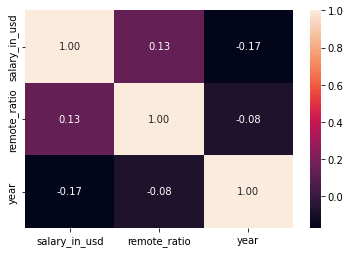

In [22]:
corr = df.corr()
sns.heatmap(corr,annot = True, fmt='.2f')

# Pairplot

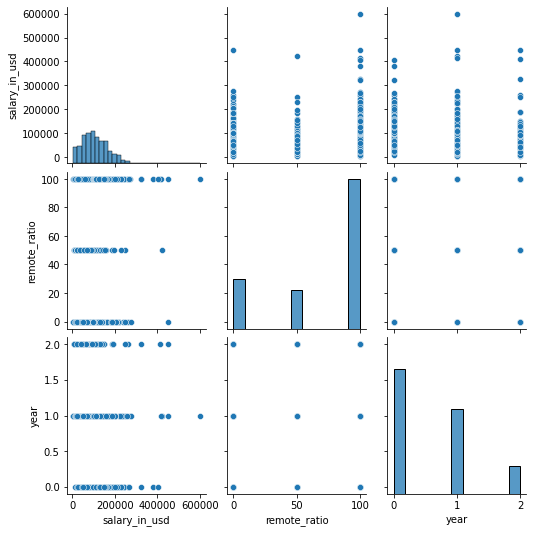

In [23]:
sns.pairplot(df)
plt.show()

In [24]:
df[categorical_features_all].head()

,experience_level,employment_type,job_title,employee_residence,company_location,company_size
0,MI,FT,Data Scientist,DE,DE,L
1,SE,FT,Machine Learning Scientist,JP,JP,S
2,SE,FT,Big Data Engineer,GB,GB,M
3,MI,FT,Product Data Analyst,HN,HN,S
4,SE,FT,Machine Learning Engineer,US,US,L


##  employee_residence - company_location

In [25]:
employee_melted_data= pd.melt(df, value_vars =['employee_residence', 'company_location'])
employee_melted_data

,variable,value
0,employee_residence,DE
1,employee_residence,JP
2,employee_residence,GB
3,employee_residence,HN
4,employee_residence,US
...,...,...
1209,company_location,US
1210,company_location,US
1211,company_location,US
1212,company_location,US


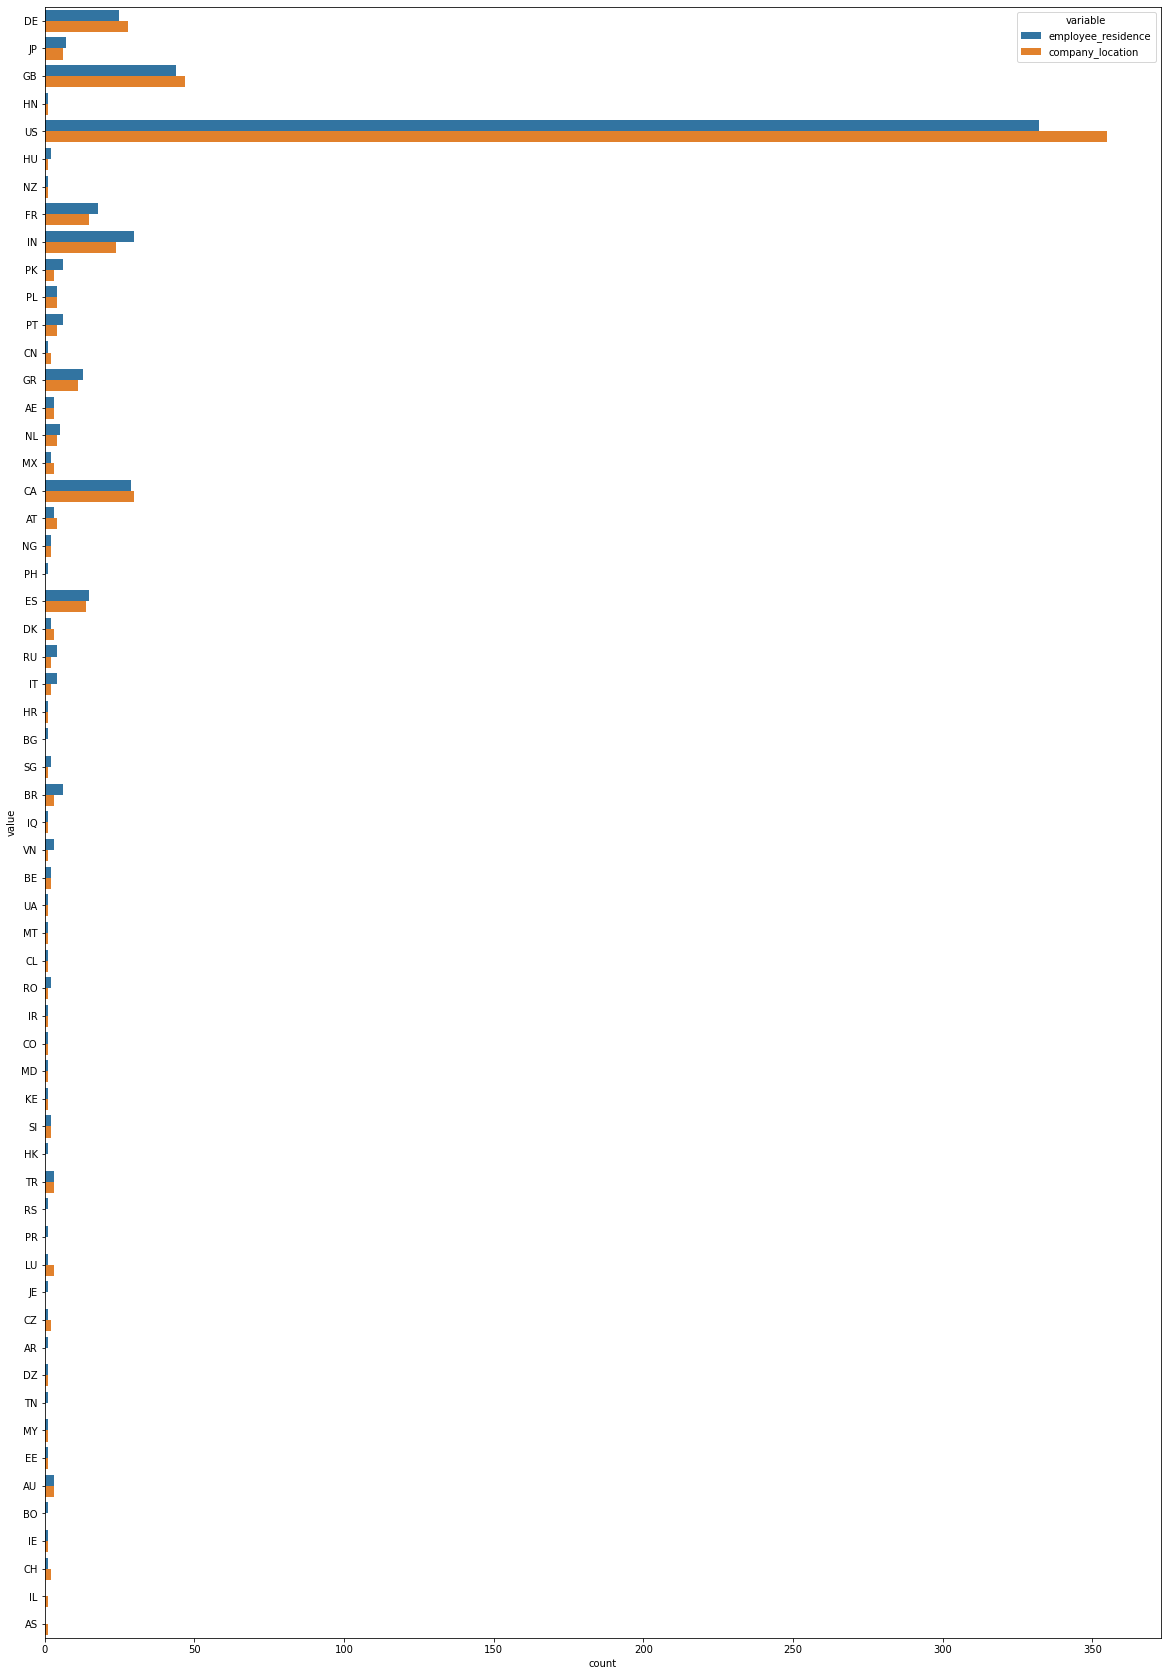

In [26]:
plt.figure(figsize = (20,30))
ax = sns.countplot(data = employee_melted_data,
                  y = "value", hue = "variable")

In [27]:
counts_employee_residence = df["employee_residence"].value_counts()

mask_employee_residence = df["employee_residence"].isin(counts_employee_residence[counts_employee_residence<5].index)
df["employee_residence"][mask_employee_residence] = "Other"

C:\Users\ahmet\AppData\Local\Temp\ipykernel_8084\893502795.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["employee_residence"][mask_employee_residence] = "Other"


In [28]:
df["employee_residence"].value_counts()

US       332
Other     71
GB        44
IN        30
CA        29
DE        25
FR        18
ES        15
GR        13
JP         7
PK         6
PT         6
BR         6
NL         5
Name: employee_residence, dtype: int64

## Job title

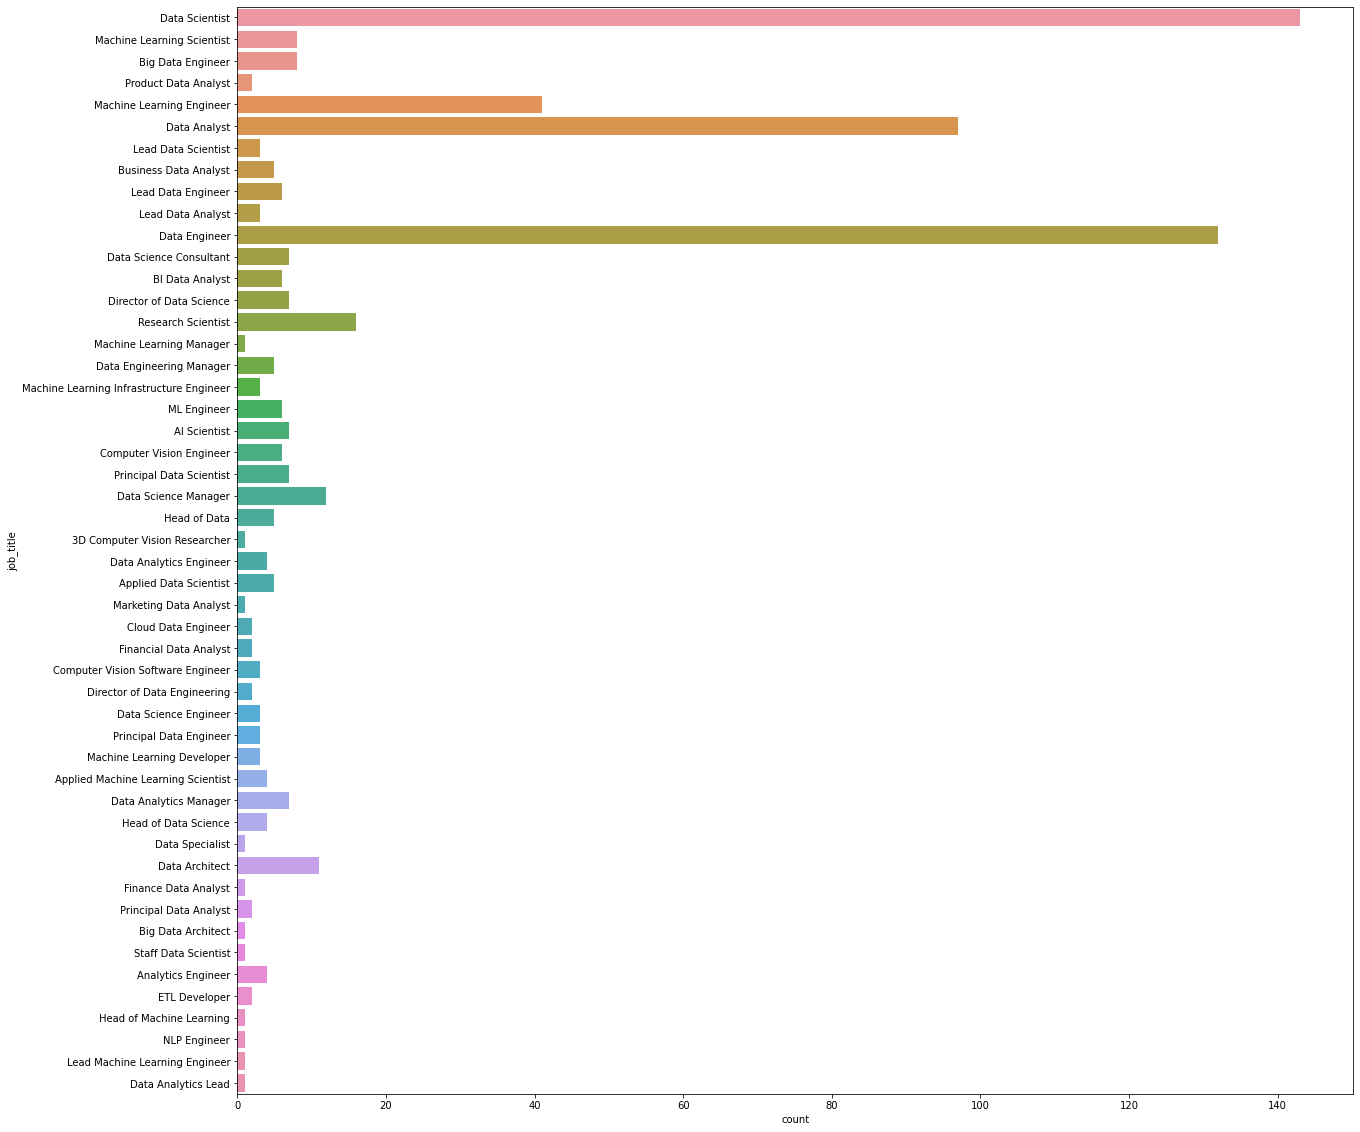

In [29]:
plt.figure(figsize= (20,20))
sns.countplot(data = df,y = "job_title")
plt.show()

In [30]:
df["job_title"].value_counts()

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

#### I will set threshold at 4 and set others less than threshold

In [31]:
threshold= 4
counts_job_title = df["job_title"].value_counts()

mask_job_title = df["job_title"].isin(counts_job_title[counts_job_title < threshold].index)
df["job_title"][mask_job_title] = "Other"

C:\Users\ahmet\AppData\Local\Temp\ipykernel_8084\3572671263.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["job_title"][mask_job_title] = "Other"


In [32]:
df["job_title"].value_counts()

Data Scientist                        143
Data Engineer                         132
Data Analyst                           97
Other                                  44
Machine Learning Engineer              41
Research Scientist                     16
Data Science Manager                   12
Data Architect                         11
Big Data Engineer                       8
Machine Learning Scientist              8
Principal Data Scientist                7
AI Scientist                            7
Data Analytics Manager                  7
Director of Data Science                7
Data Science Consultant                 7
ML Engineer                             6
Computer Vision Engineer                6
Lead Data Engineer                      6
BI Data Analyst                         6
Applied Data Scientist                  5
Data Engineering Manager                5
Head of Data                            5
Business Data Analyst                   5
Data Analytics Engineer           

### Remote ration

- 0  : "office",
- 50 : "hybrid",
- 100: "remote"

In [33]:
df.head()

,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,year
0,MI,FT,Data Scientist,79833,DE,0,DE,L,2
1,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S,2
2,SE,FT,Big Data Engineer,109024,GB,50,GB,M,2
3,MI,FT,Other,20000,Other,0,HN,S,2
4,SE,FT,Machine Learning Engineer,150000,US,50,US,L,2


In [34]:
dict_remote_ratio = {0: "office",
                    50: "hybrid",
                    100: "remote"}

df["remote_ratio"] = df["remote_ratio"].map(dict_remote_ratio)
df["remote_ratio"].value_counts()

remote    381
office    127
hybrid     99
Name: remote_ratio, dtype: int64

# Preprocess Pipeline

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

In [36]:
X = df.drop("salary_in_usd",axis = 1)
y = df["salary_in_usd"]

## Train- Test spliti

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state =42 )

print('Datasets shapes before processing: ', X_train.shape, X_test.shape)

Datasets shapes before processing:  (485, 8) (122, 8)


#### experience_level || company_size              ==> Ordinary Encoding

#### employee_residence || employment_type || company_location || remote_ratio ==> OHE

In [38]:
categorical_features_OHE = ["employee_residence", "employment_type", "company_location", "remote_ratio","job_title"]

ordinal_features = ["experience_level","company_size"]


experience_level_categories = ['EX','SE','MI','EN']
company_size_categories = ['L', 'M', 'S']

In [39]:
ordinal_processor = Pipeline([
    ('ordinary_encoder', OrdinalEncoder(categories = [experience_level_categories,company_size_categories]))
                                ])
                  
# Preprocess the categorical features
categorical_processor = Pipeline([
    ('cat_encoder', OneHotEncoder(handle_unknown='ignore'))
                                ])

data_preprocessor = ColumnTransformer([
    ("Ordinal_encoder",ordinal_processor,ordinal_features ),
    ("cat_encoder",categorical_processor,categorical_features_OHE)
                                    ]) 
data_preprocessor

ColumnTransformer(transformers=[('Ordinal_encoder',
                                 Pipeline(steps=[('ordinary_encoder',
                                                  OrdinalEncoder(categories=[['EX',
                                                                              'SE',
                                                                              'MI',
                                                                              'EN'],
                                                                             ['L',
                                                                              'M',
                                                                              'S']]))]),
                                 ['experience_level', 'company_size']),
                                ('cat_encoder',
                                 Pipeline(steps=[('cat_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['employee_residence', 'employment_type',
                                  'company_location', 'remote_ratio',
                                  'job_title'])])

## Build Pipeline

In [40]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [41]:
feature_selection_processor = Pipeline([
    ('feature_selection', SelectKBest(mutual_info_regression, k=12))
                                ])

pipeline = Pipeline([
    ('data_preprocessing', data_preprocessor),
    ("feature_selection_processor",feature_selection_processor),
    ('classifier', RandomForestRegressor(max_depth=35,
                                         max_leaf_nodes=9,
                                       min_samples_leaf=5, 
                                         n_estimators=40))
                    ])
pipeline

Pipeline(steps=[('data_preprocessing',
                 ColumnTransformer(transformers=[('Ordinal_encoder',
                                                  Pipeline(steps=[('ordinary_encoder',
                                                                   OrdinalEncoder(categories=[['EX',
                                                                                               'SE',
                                                                                               'MI',
                                                                                               'EN'],
                                                                                              ['L',
                                                                                               'M',
                                                                                               'S']]))]),
                                                  ['experience_level',
                                                   'company_size']),
                                                 ('cat_encoder',
                                                  Pipeline(steps=[('cat_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['employee_residence',
                                                   'employment_type',
                                                   'company_location',
                                                   'remote_ratio',
                                                   'job_title'])])),
                ('feature_selection_processor',
                 Pipeline(steps=[('feature_selection',
                                  SelectKBest(k=12,
                                              score_func=<function mutual_info_regression at 0x00000195D85CDE10>))])),
                ('classifier',
                 RandomForestRegressor(max_depth=35, max_leaf_nodes=9,
                                       min_samples_leaf=5, n_estimators=40))])

In [42]:
from sklearn.model_selection import RandomizedSearchCV

k_list = np.arange(9,13)

param_grid = {
    "feature_selection_processor__feature_selection__k": k_list,
    "classifier__n_estimators": [30,35,40],
    "classifier__max_depth":[35,36,37],
    "classifier__min_samples_leaf":[5],
    "classifier__max_leaf_nodes": [9]
}

search = RandomizedSearchCV(pipeline, param_grid, cv = 5,scoring='neg_mean_squared_error',verbose = 1,n_iter = 25,n_jobs = -1,)


best_model = search.fit(X_train,y_train)
print(best_model.best_estimator_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Pipeline(steps=[('data_preprocessing',
                 ColumnTransformer(transformers=[('Ordinal_encoder',
                                                  Pipeline(steps=[('ordinary_encoder',
                                                                   OrdinalEncoder(categories=[['EX',
                                                                                               'SE',
                                                                                               'MI',
                                                                                               'EN'],
                                                                                              ['L',
                                                                                               'M',
                                                                                               'S']]))]),
                                

In [43]:
predictions = best_model.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

print("R2_score: ", metrics.r2_score(y_test, predictions))

MAE: 30358.624004841826
MSE: 1846992292.995549
RMSE: 42976.64822895742
R2_score:  0.5180798550792871


C:\Users\ahmet\AppData\Local\Temp\ipykernel_8084\2131792714.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions)


<AxesSubplot:xlabel='salary_in_usd', ylabel='Density'>

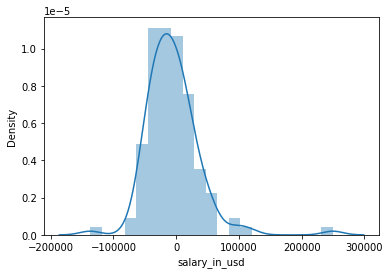

In [44]:
sns.distplot(y_test-predictions)

# Save Pipeline

In [46]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("DS_salaries_Pipe.pkl","wb")
pickle.dump(best_model, pickle_out)
pickle_out.close()

In [47]:
from joblib import dump, load

dump(best_model, 'DS_salaries_Pipe.joblib')

['DS_salaries_Pipe.joblib']